# Week3 Two-way ANOVA
## 背景描述
实验研究了操作温度和三种面板玻璃材料对示波器管输出光的影响。
这是一个压力（因子𝐴）水平数 $𝑎=3$，温度（因子𝐵）水平数 $𝑏=3$ 和重复次数 $𝑛=3$ 的双因子实验。



## 数据描述
| 变量名 | 变量含义 | 变量类型 | 变量取值范围 |
| :----------: | :--------: | :----------: | :----------: |
| （自变量）Glass_Type | 玻璃材料类型 | categorical variable | [1，2，3] |
| （自变量）Temperature |   温度   | continuous variable | [100, 125, 150] |
| （因变量）Light_Output | 输出光 | continuous variable | Real |



## 问题 
注：这里使用 \alpha=0.05 的显著性水平

1. 试判断玻璃类型和温度对输出光是否有显著影响.
2. 用适合的残差图来检验设定模型的恰当性.
3. 选出一种玻璃类型 使得不论温度高低都能使示波器管的输出光较高.
4. 估计参数$\mu$、$\tau_i$、$\beta_j$和$(\tau\beta)_{ij}\quad(i=1,...,a;j=1,...,b)$
5. 如何对这种示波器管的输出光进行预测？


## 问题1:试判断玻璃类型和温度对输出光是否有显著影响.
检验行处理效应的等式假设:  $𝐻_{01}:\tau_1=\tau_2=\cdots=\tau_a=0$  vs  $𝐻_{11}:\tau_i \neq 0, \exists i$  
检验列处理效应的等式假设:  $𝐻_{02}:\beta_1=\beta_2=\cdots=\beta_b=0$  vs  $𝐻_{12}:\beta_j \neq 0, \exists j$  
检验行与列处理没有交互作用假设:  $𝐻_{03}:(\tau\beta)_{ij}=0, \forall i,j$  vs  $𝐻_{13}:(\tau\beta)_{ij} \neq 0, \exists i,j$ 

In [1]:
# Import standard packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

# Import additional packages
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

alpha = 0.05
a = 3
b = 3
n = 3

x = pd.read_csv('Project3.csv')
data = x.values
df = pd.DataFrame(data, columns = ['Glass','Temperature','Light'])
print(df.head())

# Do the two-way ANOVA

model = ols('Light~ C(Glass) + C(Temperature) + C(Glass):C(Temperature)',df).fit()
anova_results = round(anova_lm(model), 20)
print('\n双因素方差分析表：\n', anova_results)

   Glass  Temperature  Light
0      1          100    580
1      1          100    568
2      1          100    570
3      1          125   1090
4      1          125   1087

双因素方差分析表：
                            df        sum_sq        mean_sq            F  \
C(Glass)                  2.0  1.508645e+05   75432.259259   206.370554   
C(Temperature)            2.0  1.970335e+06  985167.259259  2695.259499   
C(Glass):C(Temperature)   4.0  2.905517e+05   72637.925926   198.725707   
Residual                 18.0  6.579333e+03     365.518519          NaN   

                               PR(>F)  
C(Glass)                 3.886026e-13  
C(Temperature)           0.000000e+00  
C(Glass):C(Temperature)  1.254188e-14  
Residual                          NaN  


由上面的方差分析表可知，在$\alpha=0.05$的水平下：  
对玻璃材料来说，$p=3.886026e-13  <0.05$，所以玻璃材料对Light有显著影响；  
对温度来说，$p=0.000000e+00  <0.05$，所以温度对Light也具有显著影响；  
对玻璃材料和温度的交互因素来说，$p=1.254188e-14<0.05$，所以俩交互因素对Light也具有显著影响.

## 1.2多重比较
在双因子析因设计实验中，如果交互作用是显著的，一个因子（例如，因子 𝐴）的均值间的比较可能由于交互作用而模糊不清。

解决这类问题的方法是：将另一个因子（因子 𝐵）固定在一特定水平上，在此水平上对因子 𝐴 的均值使用 Tukey 检验法。  (多重比较)
由上面方差分析表可知，行均值、列均值和交互项均有显著性差异，
所以下面我们进一步固定温度水平为 70℉，（举个例子）
对 3 种材料进行多重比较，以Tukey的Honestly Significant Difference(HSD)检验法为例: 

固定温度水平为 125℉: 三种材料之间的多重比较: 
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
     1      2 -52.3333 0.0523 -105.2908  0.6241  False
     1      3 -32.6667  0.221  -85.6241 20.2908  False
     2      3  19.6667 0.5285  -33.2908 72.6241  False
------------------------------------------------------


/usr/local/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


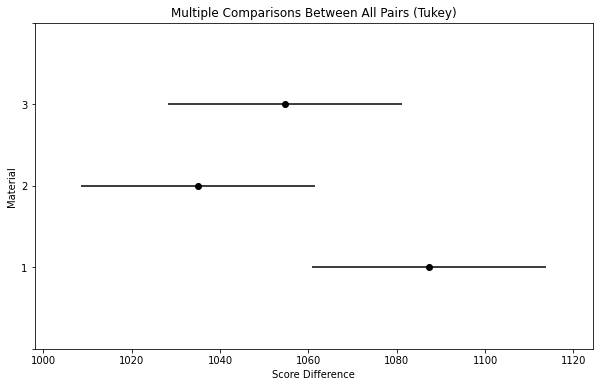

In [2]:
multiComp = MultiComparison(df.loc[df['Temperature'] == 125, 'Light'], df.loc[df['Temperature'] == 125, 'Glass'])
tukey = multiComp.tukeyhsd()
print('固定温度水平为 125℉: 三种材料之间的多重比较: \n', tukey)

tukey.plot_simultaneous(ylabel= 'Material', xlabel= 'Score Difference')
print('\n')

结果说明：  
这一分析表明，当温度水平为 125℉ 时，三种材料类型的区间各有重叠，但是明显的是材料2和3重叠的更多，更显著。
## Q2.用残差检验设定模型的恰当性：  
### 2.1 计算得残差

In [3]:

list_temp = [100, 125,150]
data_res = data.astype(float)
for i in range(a):
    for j in list_temp:
        cnt = data[(data[:,0] == i + 1) & (data[:,1] == j),2]
        data_res[(data_res[:,0] == i + 1) & (data_res[:,1] == j),2] = cnt-np.mean(cnt)
df = pd.DataFrame(data_res, columns = ['Glass','Temperature','Light_residual'])
print(df.sample(frac=0.3))

    Glass  Temperature  Light_residual
4     1.0        125.0       -0.333333
5     1.0        125.0       -2.333333
17    2.0        150.0      -14.000000
23    3.0        125.0       11.333333
18    3.0        100.0      -27.333333
19    3.0        100.0        1.666667
22    3.0        125.0       -1.666667
8     1.0        150.0        0.000000


### 2.2 正态概率图
在一条直线上就认为是近似一样的，除了有异常值的情况


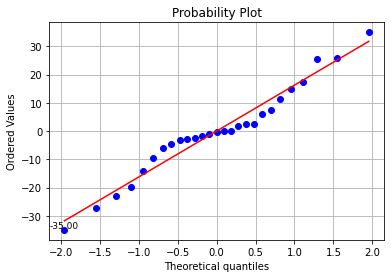

In [4]:
res = data_res[:, 2]
osm, osr = stats.probplot(res, dist = 'norm', plot = plt)
x = osm[0][0]
y = osm[1][0]
plt.text(x, y, '%.2f' % float(y), ha='center', va= 'bottom', fontsize=9)
plt.grid()
plt.show()

由anova table可以得，residual 残差的MSE是365.518519,Outlier的检测可由如下方法得：计算标准化残差：$d_{ij} = \frac{e_{ij}}{\sqrt{MS_E}}$。一般地，标准化残差约 68% 落在 ±1 之内，约 95% 落在 ±2 之内，几乎全部落在 ±3 之内。标准化残差的绝对值大于3的残差是一个可能的异常值。
无特别的证据说明违背数据正态性；
 
  


In [5]:
countMap={'68%':0,'95%':0,'outlier':{'num':0,'dij':[]}}
for eij in df['Light_residual']:
    dij=eij/np.sqrt(365.52)
    if -2<dij<2:
        countMap['95%']=countMap['95%']+1
        if -1<dij<1:
            countMap['68%']=countMap['68%']+1
    elif -3<dij<3:# 
        num_old=countMap['outlier']['num']
        num_new=num_old+1
        countMap['outlier']['num']=num_new
        list_old=countMap['outlier']['dij']
        list_new=list_old.append(dij)
        countMap['outlier']['dij']=list_new


In [6]:
print("countMap的具体情况为:在(-1,1)之间的dij个数为"+str(round(countMap['68%']/27*100,2))+"\ncountMap的具体情况为:在(-2,2)之间的dij个数为"+str(round(countMap['95%']/27*100,2)))

countMap的具体情况为:在(-1,1)之间的dij个数为74.07
countMap的具体情况为:在(-2,2)之间的dij个数为100.0


可以看出，在上述标准下，是没有明显的离群值的
### 2.3用Shapiro-Wilk检验进行正态性检验

In [7]:
SW, pVal = stats.shapiro(res)
print(round(SW, 2))
print(round(pVal, 2))

if pVal > alpha:
    print('\n接受原假设，残差满足正态性')
else:
    print('\nSince p-value > 0.05, reject the null hypothesis') 

0.97
0.52

接受原假设，残差满足正态性


### 残差与预测值的关系图

Text(0, 0.5, 'e_ijk')

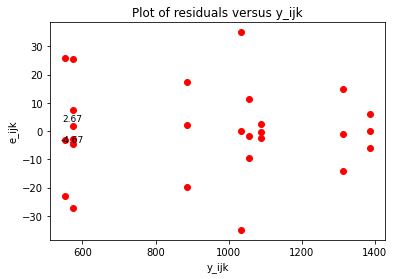

In [8]:
y2 = []
for i in range(a):
    for j in list_temp:
        for k in range(n):
            y2.append(np.mean(data[(data[:,0] == i + 1) & (data[:,1] == j), 2]))
plt.scatter(y2, res, c = 'red')
plt.text(y2[0], res[1], '%.2f' % float(res[1]), ha='center', va= 'bottom', fontsize=9)
plt.text(y2[0], res[3], '%.2f' % float(res[3]), ha='center', va= 'bottom', fontsize=9)
plt.title('Plot of residuals versus y_ijk')
plt.xlabel('y_ijk')
plt.ylabel('e_ijk')

Text(0, 0.5, 'e_ijk')

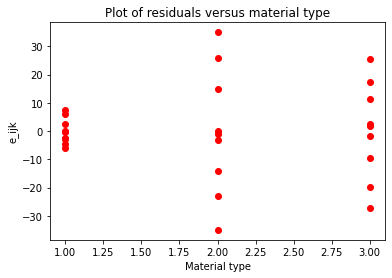

In [9]:
### 2.4 残差与材料的关系图
y3 = data_res[:,0]
plt.scatter(y3, res, c = 'red')
plt.title('Plot of residuals versus material type')
plt.xlabel('Material type')
plt.ylabel('e_ijk')

可以看出第二种材料了性的波动比其他两种材料大，第一种材料波动最小

### 2.5 残差与温度的关系图

Text(0, 0.5, 'e_ijk')

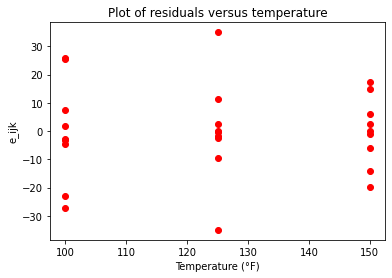

In [10]:
y4 = data_res[:,1]
plt.scatter(y4, res, c = 'red')
plt.title('Plot of residuals versus temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('e_ijk')

各温度的波动从直观上来说，温度为125时最大，温度为150时最小

## Q3:选出一种玻璃类型 使得不论温度高低都能使示波器管的输出光较高.

In [11]:
# 固定效应模型分析
data_avg = data.astype(float) * 1
for i in range(a):
    for j in list_temp:
        cnt = data[(data[:,0] == i + 1) & (data[:,1] == j),2]
        data_avg[(data_avg[:,0] == i + 1) & (data_avg[:,1] == j),2] = np.mean(cnt)
df = pd.DataFrame(data_avg, columns = ['Glass', 'Temperature', 'Light_avg'])
df

,Glass,Temperature,Light_avg
0,1.0,100.0,572.666667
1,1.0,100.0,572.666667
2,1.0,100.0,572.666667
3,1.0,125.0,1087.333333
4,1.0,125.0,1087.333333
5,1.0,125.0,1087.333333
6,1.0,150.0,1386.000000
7,1.0,150.0,1386.000000
8,1.0,150.0,1386.000000
9,2.0,100.0,553.000000


In [12]:
type1 = data_avg[[0,3,6], 2]
print(type1)
type2 = data_avg[[9,12,15], 2]
print(type2)
type3 = data_avg[[18,21,24], 2]
print(type3)

[ 572.66666667 1087.33333333 1386.        ]
[ 553. 1035. 1313.]
[ 573.33333333 1054.66666667  886.66666667]


In [13]:
list_temp#注意这里的Index顺序很重要

[100, 125, 150]

           type1   type2        type3
100   572.666667   553.0   573.333333
125  1087.333333  1035.0  1054.666667
150  1386.000000  1313.0   886.666667


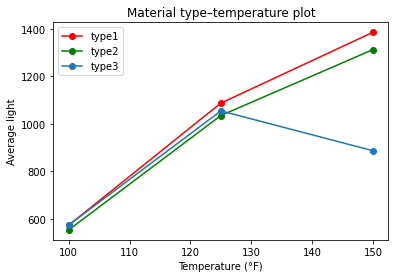

In [14]:
c1 = pd.Series(type1, index = list_temp, name = 'type1')
c2 = pd.Series(type2, index = list_temp, name = 'type2')
c3 = pd.Series(type3, index = list_temp, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)
print(df)
plt.plot(df.iloc[:,0], color = 'red', marker = 'o', label = 'type1')
plt.plot(df.iloc[:,1], color = 'green', marker = 'o', label = 'type2')
plt.plot(df.iloc[:,2], marker = 'o', label = 'type3')
plt.title('Material type–temperature plot')
plt.xlabel('Temperature (°F)')
plt.ylabel('Average light')
plt.legend(['type1', 'type2', 'type3'])

上图绘制了每一种处理组合的平均光图，因为线段有部分较差，所以交互作用显著在图上不是特别明显，还需要进一步判断。
一般来说，不管是什么材料，在低温处的光比较少。从低温变化至中等温度时，再从中等温度到高温变化时，只有第三种材料都出现了先上升后下降的趋势。
其他两种材料都没有。

又因为第一种材料的波动最小，且平均来看，在100，125，150时，type1的Light逗比type2的Light看起来较高。所以选择type1的Glass使不管温度的高低都得到Light较高的结果。

## Q4.估计参数 & Q5.利用参数预测
$\mu$、$\tau_i$、$\beta_j$和$(\tau\beta)_{ij}\quad(i=1,...,a;j=1,...,b)$  
$\hat{\mu}=\bar{y}_{\cdots}$  
$\hat{\tau_i}=\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdots},\quad i = 1,2,\cdots,a$  
$\hat{\beta_j}=\bar{y}_{\cdot j\cdot}-\bar{y}_{\cdots},\quad j = 1,2,\cdots,b$  
$\hat{\tau\beta}_{ij}=\bar{y}_{ij\cdot}-\bar{y}_{i\cdot\cdot}-\bar{y}_{\cdot j\cdot}+\bar{y}_{\cdots},\quad i = 1,2,\cdots,a\quad j = 1,2,\cdots,b$

In [15]:
# 参数估计
mu = np.mean(data[:,2])
print('总平均效应：', round(mu, 2))

tau = []
for i in range(a):
    tau.append(np.mean(data[data[:,0] == i + 1, 2]) - mu)
print('材料因子的水平效应：\n', np.round(tau, 2))

beta = []
for j in list_temp:
    beta.append(np.mean(data[data[:,1] == j, 2]) - mu)
print('温度因子的水平效应：\n', np.round(beta, 2))

tau_beta = []
k = 0
for i in range(a):
    tau_beta.append([])
    for j in range(b):
        cnt = data_avg[0 + 3 * k, 2] - tau[i] - beta[j] + mu
        tau_beta[i].append(cnt)
        k += 1
print('两因子之间的交互作用效应：\n', np.round(tau_beta, 2))

总平均效应： 940.19
材料因子的水平效应：
 [  75.15   26.81 -101.96]
温度因子的水平效应：
 [-373.85  118.81  255.04]
两因子之间的交互作用效应：
 [[1811.56 1833.56 1996.  ]
 [1840.22 1829.56 1971.33]
 [1989.33 1978.   1673.78]]


In [16]:
# 构造这 8 个变量
list_A = [100, 125, 150]
# list_A = [-1, 0, 1]
list_B1 = [1, 0, -1]
list_B2 = [0, 1, -1]
A = data[:,1] * 1
B1 = B2 = data[:, 0]
for i in range(3):
    A = [list_A[i] if j == list_temp[i] else j for j in A]
    B1 = [list_B1[i] if j == i + 1 else j for j in B1]
    B2 = [list_B2[i] if j == i + 1 else j for j in B2]
AA = [A[k] ** 2 for k in range(len(A))]
AB1 = [A[k] * B1[k] for k in range(len(A))]
AB2 = [A[k] * B2[k] for k in range(len(A))]
AAB1 = [AA[k] * B1[k] for k in range(len(A))]
AAB2 = [AA[k] * B2[k] for k in range(len(A))]
df = pd.DataFrame(A, columns = ['A'])
df['B1'] = B1
df['B2'] = B2
df['AA'] = AA
df['AB1'] = AB1
df['AB2'] = AB2
df['AAB1'] = AAB1
df['AAB2'] = AAB2
df['Light'] = data[:,2]
print(df.head())

# 训练模型
model = ols('Light~ A + B1 + B2 + AA + AB1 + AB2 + AAB1 + AAB2',df).fit()
param = model.params
model.summary()
# AAB1和AAB2一个显著一个不显著，这种交互效应是不能拿掉的(a-1)个潜变量有一个是显著的，那这种就不应该被代替
# AAB1和AAB2同生同死，表示温度的平方和B的关系，但只要有一项显著，它就是显著的。

     A  B1  B2     AA  AB1  AB2   AAB1  AAB2  Light
0  100   1   0  10000  100    0  10000     0    580
1  100   1   0  10000  100    0  10000     0    568
2  100   1   0  10000  100    0  10000     0    570
3  125   1   0  15625  125    0  15625     0   1090
4  125   1   0  15625  125    0  15625     0   1087


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Light   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     824.8
Date:                Thu, 18 Mar 2021   Prob (F-statistic):           1.78e-21
Time:                        14:15:52   Log-Likelihood:                -112.51
No. Observations:                  27   AIC:                             243.0
Df Residuals:                      18   BIC:                             254.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4968.7778    191.292    -25.975      0.000   -5370.666   -4566.889
A             83.8667      3.127     26.818      0.000      77.297      90.437
B1          1322.7778    270.527      4.890      0.000     754.421    1891.134
B2          1553.7778    270.527      5.744      0.000     985.421    2122.134
AA            -0.2852      0.012    -22.834      0.000      -0.311      -0.259
AB1          -24.4000      4.423     -5.517      0.000     -33.692     -15.108
AB2          -27.8667      4.423     -6.301      0.000     -37.158     -18.575
AAB1           0.1124      0.018      6.362      0.000       0.075       0.149
AAB2           0.1220      0.018      6.905      0.000       0.085       0.159
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   2.179
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.035
Skew:                           0.009   Prob(JB):                        0.983
Kurtosis:                       3.175   Cond. No.                     1.52e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

由上面的模型summary可知：
$\hat{Light} = +1059+314.44 *A+28.33 *B[1]-24 *B[2]-178.22 *A^2+92.22 *AB[1]+65.556 *AB[2]+70.22 *A^2B[1]+76.22*A^2B[2]$

这里可以类比数据标准化/中心化后模型的影响，是我们通过编码方式和非编码方式得到曲线不同编码很像标准化的一种变换

type1
-3646.000000003717
59.46666666673558
-0.1728000000000327
type2
-3414.9999999925685
55.999999999940314
-0.1631999999997623
type3
-7845.33333333563
136.13333333331812
-0.5194666666668375


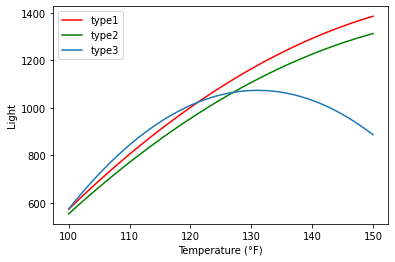

In [17]:
# 拟合响应曲线
temp = np.linspace(100,150)#注意这里linespace应该顺应上面的listA修改
# list_A = [-1, 0, 1]
# list_B1 = [1, 0, -1]
# list_B2 = [0, 1, -1]
life_type1 = param[0] + param[1] * temp + param[2] * list_B1[0] + param[3] * list_B2[0] + param[4] * (temp ** 2) + param[5] * temp * list_B1[0] + param[6] * temp * list_B2[0] + param[7] * (temp ** 2) * list_B1[0] + param[8] * (temp ** 2) * list_B2[0]
print("type1")
print(param[0]+param[2] * list_B1[0]+param[3] * list_B2[0])
print(param[1]+param[5] *list_B1[0]+param[6]*list_B2[0])
print(param[4]+param[7] *list_B1[0]+param[8]*list_B2[0])
life_type2 = param[0] + param[1] * temp + param[2] * list_B1[1] + param[3] * list_B2[1] + param[4] * (temp ** 2) + param[5] * temp * list_B1[1] + param[6] * temp * list_B2[1] + param[7] * (temp ** 2) * list_B1[1] + param[8] * (temp ** 2) * list_B2[1]
print("type2")
print(param[0]+param[2] * list_B1[1]+param[3] * list_B2[1])
print(param[1]+param[5] *list_B1[1]+param[6]*list_B2[1])
print(param[4]+param[7] *list_B1[1]+param[8]*list_B2[1])
life_type3 = param[0] + param[1] * temp + param[2] * list_B1[2] + param[3] * list_B2[2] + param[4] * (temp ** 2) + param[5] * temp * list_B1[2] + param[6] * temp * list_B2[2] + param[7] * (temp ** 2) * list_B1[2] + param[8] * (temp ** 2) * list_B2[2]
print("type3")
print(param[0]+param[2] * list_B1[2]+param[3] * list_B2[2])
print(param[1]+param[5] *list_B1[2]+param[6]*list_B2[2])
print(param[4]+param[7] *list_B1[2]+param[8]*list_B2[2])

c1 = pd.Series(life_type1, index = temp, name = 'type1')
c2 = pd.Series(life_type2, index = temp, name = 'type2')
c3 = pd.Series(life_type3, index = temp, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', label = 'type1')
plt.plot(df.iloc[:,1], color = 'green', label = 'type2')
plt.plot(df.iloc[:,2], label = 'type3')
plt.xlabel('Temperature (°F)')
plt.ylabel('Light')
plt.legend(['type1', 'type2', 'type3'])


type1
-3646.000000003717
59.46666666673558
-0.1728000000000327
type2
-3414.9999999925685
55.999999999940314
-0.1631999999997623
type3
-7845.33333333563
136.13333333331812
-0.5194666666668375


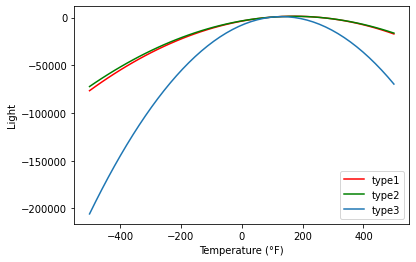

In [21]:
# 拟合响应曲线
temp = np.linspace(-500,500)#注意这里linespace应该顺应上面的listA修改,这里图形的不同与横坐标的scaler有关
# list_A = [-1, 0, 1]
# list_B1 = [1, 0, -1]
# list_B2 = [0, 1, -1]
life_type1 = param[0] + param[1] * temp + param[2] * list_B1[0] + param[3] * list_B2[0] + param[4] * (temp ** 2) + param[5] * temp * list_B1[0] + param[6] * temp * list_B2[0] + param[7] * (temp ** 2) * list_B1[0] + param[8] * (temp ** 2) * list_B2[0]
print("type1")
print(param[0]+param[2] * list_B1[0]+param[3] * list_B2[0])
print(param[1]+param[5] *list_B1[0]+param[6]*list_B2[0])
print(param[4]+param[7] *list_B1[0]+param[8]*list_B2[0])
life_type2 = param[0] + param[1] * temp + param[2] * list_B1[1] + param[3] * list_B2[1] + param[4] * (temp ** 2) + param[5] * temp * list_B1[1] + param[6] * temp * list_B2[1] + param[7] * (temp ** 2) * list_B1[1] + param[8] * (temp ** 2) * list_B2[1]
print("type2")
print(param[0]+param[2] * list_B1[1]+param[3] * list_B2[1])
print(param[1]+param[5] *list_B1[1]+param[6]*list_B2[1])
print(param[4]+param[7] *list_B1[1]+param[8]*list_B2[1])
life_type3 = param[0] + param[1] * temp + param[2] * list_B1[2] + param[3] * list_B2[2] + param[4] * (temp ** 2) + param[5] * temp * list_B1[2] + param[6] * temp * list_B2[2] + param[7] * (temp ** 2) * list_B1[2] + param[8] * (temp ** 2) * list_B2[2]
print("type3")
print(param[0]+param[2] * list_B1[2]+param[3] * list_B2[2])
print(param[1]+param[5] *list_B1[2]+param[6]*list_B2[2])
print(param[4]+param[7] *list_B1[2]+param[8]*list_B2[2])

c1 = pd.Series(life_type1, index = temp, name = 'type1')
c2 = pd.Series(life_type2, index = temp, name = 'type2')
c3 = pd.Series(life_type3, index = temp, name = 'type3')
df = pd.concat([c1, c2, c3], axis = 1)

plt.plot(df.iloc[:,0], color = 'red', label = 'type1')
plt.plot(df.iloc[:,1], color = 'green', label = 'type2')
plt.plot(df.iloc[:,2], label = 'type3')
plt.xlabel('Temperature (°F)')
plt.ylabel('Light')
plt.legend(['type1', 'type2', 'type3'])


由OLS结果可以看出， AB1和AB2都大于0.05为显著的。
根据分层原理，如果高阶项（如AAB项）显著，那它必须包含分解它的所有低阶项（如AA、AB、A、B）
所以得到了Response Curve 拟合后的结果，即可对数据进行预测。


拟合曲线[-1, 1]：  
材料类型为 1：  
$y =1087.33 +406.67∗ Temp -108 ∗ Temp^2 $  
材料类型为 2：  
$y = 1035 +380 ∗ Temp − 102 ∗ Temp^2$  
材料类型为 3：  
$y = 1054.6 +156.67 ∗ Temp − 324.67 ∗ Temp^2$  
  
拟合曲线[100, 125,150]：  
材料类型为 1：  
$y =  -3646+59.47 ∗ Temp -0.17 ∗ Temp^2 $   
材料类型为 2：  
$y = -3415 +56 ∗ Temp − 0.16 ∗ Temp^2$  
材料类型为 3：  
$y = -7845.33 + 136.13 ∗ Temp − 0.519 ∗ Temp^2$  
上图显示了这 3 个预测公式声称的响应曲线。 